<a href="https://colab.research.google.com/github/Tdogthe1/Skyline-Math-200/blob/main/Copy_of_Copy_of_Moderation_Anova_and_Chi_Squared_(Education_and_Income)1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import researchpy as rp

In [4]:
#New Dataset with Demographics
url='https://drive.google.com/file/d/1J1lYAGJTivdEYYFoVK7m7tShm4kNhSgh/view?usp=sharing'
path= 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head(5)

<ipython-input-4-f83a3cdbc7e9>:4: DtypeWarning: Columns (91,92,104,105,106,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,385,386,387,388,389,390,391,392,393,395,396,397,398,399,400,401,402,403,404,405,406,407,408,440,441,442,481,482,483,484,485,486,496,497,498,499,560,567,657,729,730,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,944,945,946,947,948,9

,RACE,ETHNICITY,h4od1y,iyear4,AID,BIO_SEX,agew1,IMONTH4,IDAY4,MACNO4,...,H4EO5D,H4EO5E,H4EO5F,H4EO5G,H4EO5H,H4EO5I,H4EO5J,H4EO6,H4EO7,AGE4
0,2,0,1976,2008,57101310,2,19.42739726,5,6,2288160,...,0,0,0,0,0,0,0,2,1,32
1,5,0,1976,2008,57103869,1,20.43013699,5,22,2288238,...,0,0,0,0,0,0,0,4,1,32
2,2,0,1981,2008,57109625,1,15.17808219,11,2,2288258,...,,,,,,,,,,27
3,2,0,1981,2008,57111071,1,14.9260274,6,29,2288260,...,0,0,0,0,0,0,0,1,2,27
4,2,0,1979,2008,57113943,1,17.34246575,11,11,2288282,...,0,0,0,0,0,0,0,5,3,29


In [ ]:
df['Military_Time'] = df['H4SP1H']
df['Military_Time'] = pd.to_numeric( df['Military_Time'] , errors ='coerce')
df['Military_Time'] = df['Military_Time'].loc[ df['Military_Time'] < 9999996]
df['Military_Time'].describe()

count    5114.000000
mean        6.560227
std         4.930734
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        98.000000
Name: Military_Time, dtype: float64

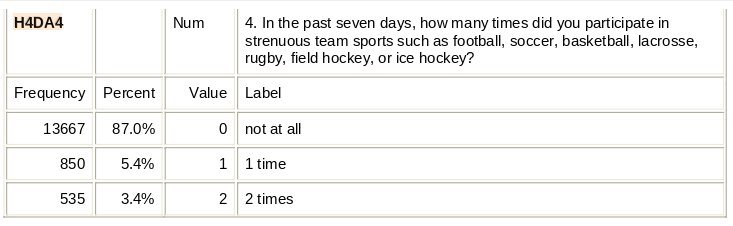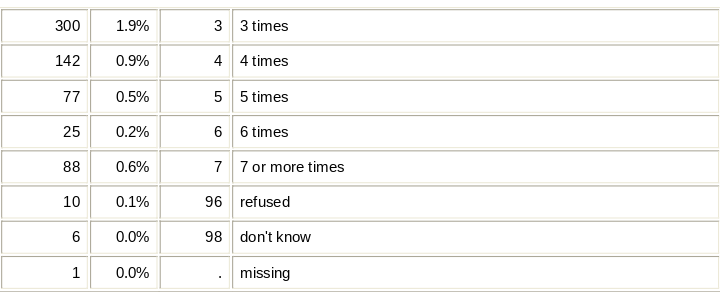

In [ ]:
df['H4DA4'].dtype

dtype('O')

In [ ]:
df['Strenuous_sports'] = df['H4DA4']
df['Strenuous_sports'] = df['Strenuous_sports'].loc[df['Strenuous_sports'] !='96']
df['Strenuous_sports'] = df['Strenuous_sports'].loc[df['Strenuous_sports'] !='98']
df['Strenuous_sports'] = df['Strenuous_sports'].loc[df['Strenuous_sports'] !=' ']
df['Strenuous_sports'].value_counts()

0     3556
0      910
1      229
2      145
3       82
1       55
4       35
7       24
2       19
3       17
5       13
4       13
7        6
6        4
5        3
96       1
98       1
Name: Strenuous_sports, dtype: int64

In [ ]:
df['Strenuous_sports'].replace( ['0','1','2','3','4','5','6','7',],
                      ['not at all','1 Time','2 Times','3 Times','4 Times','5 Times','6 Times','7 Times or more'] , inplace=True)
df['Strenuous_sports'].value_counts()

0                  3556
not at all          910
1                   229
2                   145
3                    82
1 Time               55
4                    35
7                    24
2 Times              19
3 Times              17
5                    13
4 Times              13
7 Times or more       6
6                     4
5 Times               3
96                    1
98                    1
Name: Strenuous_sports, dtype: int64

<Axes: xlabel='Military_time', ylabel='Strenuous_sports'>

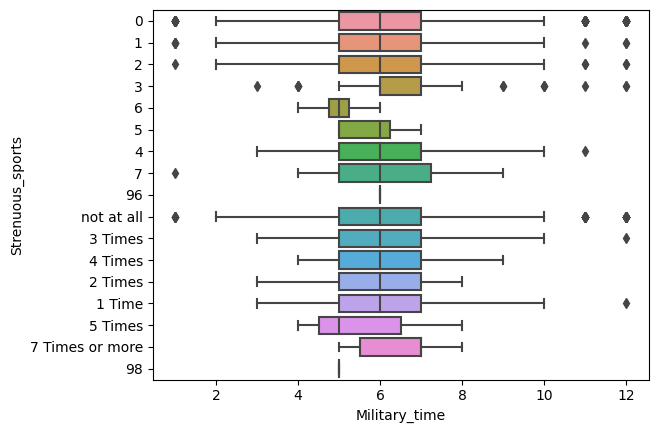

In [ ]:
sns.boxplot(y = 'Strenuous_sports' , x ='Military_time', data = df)

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [ ]:
model = ols('Military_time ~ C(Strenuous_sports)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=1)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Strenuous_sports),16.0,29.439698,1.839981,0.596936,0.888805
Residual,5083.0,15667.717165,3.082376,NaN,NaN


In [ ]:
import statsmodels.stats.multicomp as multi


In [ ]:
sub = df[['Military_time','Strenuous_sports']].dropna() 
mc1 = multi.MultiComparison(sub['Military_time'], sub['Strenuous_sports'])
res = mc1.tukeyhsd()
print(res.summary())

TypeError: ignored

In [ ]:
res.plot_simultaneous(ylabel= 'Strenuous_sports', xlabel= 'Military_time')

NameError: ignored

## Moderation Variable
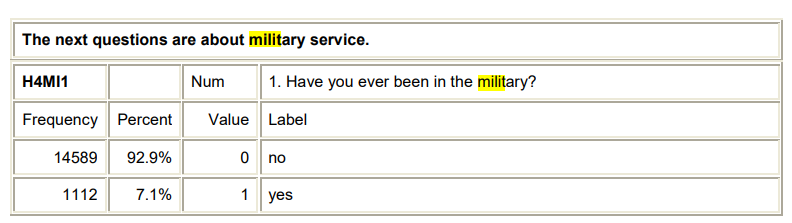

In [ ]:
df['military'] = df['H4MI1']
df['military'] = df['military'].loc[df['military'] !=' ']
df['military'].replace([0,1] ,['NO','YES'], inplace = True)
df['military'].value_counts()

NO     4763
YES     351
Name: military, dtype: int64

In [ ]:
#Moderation
#subset by categorical 3rd variable
sub2=df[(df['military']=='NO')]
sub3=df[(df['military']=='YES')]





In [ ]:
sub2.groupby('Strenuous_sports')['Military_time'].mean()

Strenuous_sports
0     6.341765
1     6.309524
2     6.415385
3     6.450704
4     6.285714
5     6.111111
6     5.333333
7     6.105263
96    6.000000
98    5.000000
0     6.446262
1     6.408163
2     5.736842
3     6.562500
4     6.333333
5     5.666667
7     6.500000
Name: Military_time, dtype: float64

In [ ]:
sub3.groupby('Strenuous_sports')['Military_time'].mean()

Strenuous_sports
0    5.995575
1    6.055556
2    5.133333
3    7.000000
4    6.571429
5    5.000000
6    4.000000
7    6.000000
0    5.461538
1    5.500000
3    5.000000
4    5.000000
Name: Military_time, dtype: float64

<Axes: xlabel='Military_time', ylabel='Strenuous_sports'>

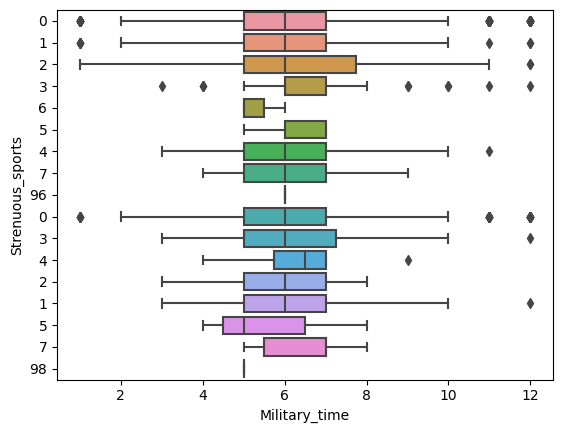

In [ ]:
# Education and income for persons No in the Military
sns.boxplot(y = 'Strenuous_sports' , x ='Military_time', data = sub2)

<Axes: xlabel='Military_time', ylabel='Strenuous_sports'>

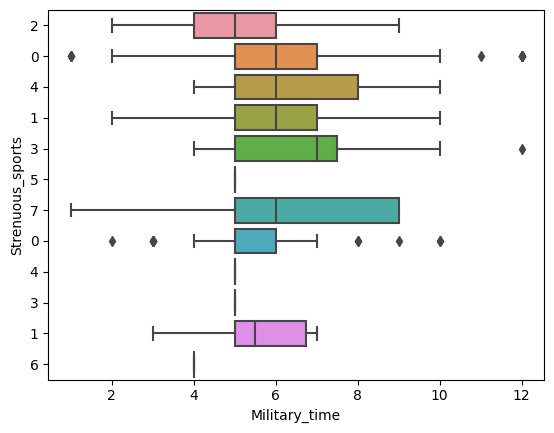

In [ ]:
# Education and income for persons In the Military
sns.boxplot(y = 'Strenuous_sports' , x ='Military_time', data = sub3)

In [85]:
import statsmodels.api
import statsmodels.formula.api as smf

In [86]:
#Moderation using sub2 (Never been in the Military)

model1 = ols('Military_time ~ C(Strenuous_sports)', data=sub2).fit()
aov_table = sm.stats.anova_lm(model1, typ=1)
aov_table

ValueError: ignored

In [87]:

sub_2 = sub2[['Military_time','Strenuous_sports']].dropna() 
mc2 = multi.MultiComparison(sub_2['Military_time'], sub_2['Strenuous_sports'])
res2 = mc2.tukeyhsd()
print(res2.summary())

TypeError: ignored

In [88]:
sub_2.plot_simultaneous(ylabel= "Strenuous_sports", xlabel= "Military_time")

AttributeError: ignored

In [89]:
#Moderation using sub2 (Has been in the Military)

model2 = ols('Military_time ~ C(Strenuous_sports)', data=sub3).fit()
aov_table = sm.stats.anova_lm(model2, typ=1)
aov_table

ValueError: ignored

In [ ]:
sub_3 = sub3[['income','EDU']].dropna() 
mc3 = multi.MultiComparison(sub_3['income'], sub_3['EDU'])
res3 = mc3.tukeyhsd()
print(res3.summary())

                    Multiple Comparison of Means - Tukey HSD, FWER=0.05                    
       group1               group2           meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------------------------------------
   Bachelors Degree        Graduate Degree  -6322.3437 0.9243 -32479.3453 19834.6579  False
   Bachelors Degree    High School diploma  -4889.9991 0.7607 -17768.2656  7988.2673  False
   Bachelors Degree No High School diploma -21708.7073  0.507 -62060.1337  18642.719  False
    Graduate Degree    High School diploma   1432.3445 0.9986 -22244.0998 25108.7888  False
    Graduate Degree No High School diploma -15386.3636 0.8135 -60363.7121 29590.9848  False
High School diploma No High School diploma -16818.7082 0.6777  -55608.177 21970.7606  False
-------------------------------------------------------------------------------------------


In [84]:
res3.plot_simultaneous(ylabel= "Strenuous_sports", xlabel= "Military_Time")

NameError: ignored

### Moderation for a Chi Squared Test

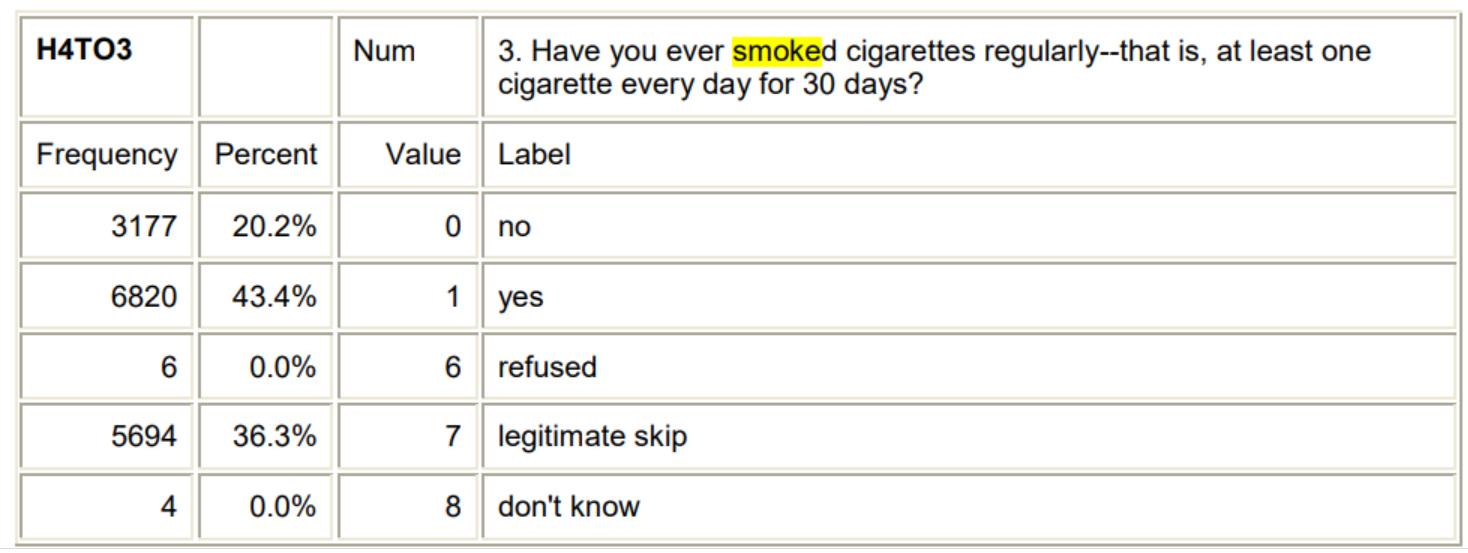

In [ ]:
df['Smoke_Reg'] = df['H4TO3']
df['Smoke_Reg'] = df['Smoke_Reg'].loc[ df['Smoke_Reg'] !=' ' ]
df['Smoke_Reg'] = df['Smoke_Reg'].loc[ df['Smoke_Reg'] !=6 ]
df['Smoke_Reg'] = df['Smoke_Reg'].loc[ df['Smoke_Reg'] !=7 ]
df['Smoke_Reg'] = df['Smoke_Reg'].loc[ df['Smoke_Reg'] !=8 ]
df['Smoke_Reg'].replace( [0,1] , ['NO','YES'], inplace=True)
df['Smoke_Reg'].value_counts()

YES    2312
NO     1008
Name: Smoke_Reg, dtype: int64

In [ ]:
table = pd.crosstab( df['EDU'] , df['Smoke_Reg'] , normalize = 'columns').round(2)
table

Smoke_Reg,NO,YES
EDU,,
Bachelors Degree,0.31,0.16
Graduate Degree,0.14,0.04
High School diploma,0.51,0.68
No High School diploma,0.04,0.12


In [ ]:
crosstab, test_results, expected = rp.crosstab(df['EDU'], df['Smoke_Reg'],test= "chi-square",expected_freqs= True,prop= "cell")
                                               
test_results  

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,254.7633
1,p-value =,0.0000
2,Cramer's V =,0.2770


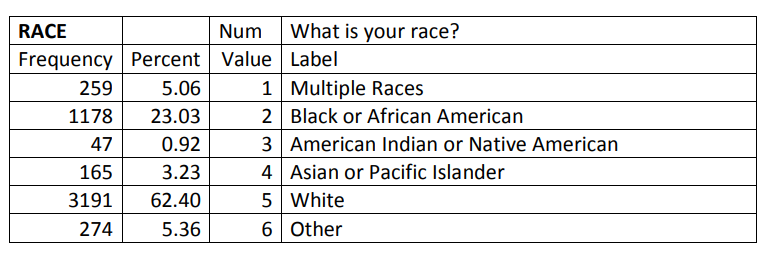

In [ ]:
df['RACE'].replace([1,2,3,4,5,6], ['Multiple Races','Black', 'Native American','Asian or PI','White','Other'], inplace =True)
df['RACE'].value_counts()

White              3191
Black              1178
Other               274
Multiple Races      259
Asian or PI         165
Native American      47
Name: RACE, dtype: int64

In [ ]:
#Moderation
#subset by categorical 3rd variable
sub1=df[(df['RACE']=='Multiple Races')]
sub2=df[(df['RACE']=='Black')]
sub3=df[(df['RACE']=='Native American')]
sub4=df[(df['RACE']=='Asian or PI')]
sub5=df[(df['RACE']=='White')]
sub6=df[(df['RACE']=='Other')]


In [ ]:
#Moderation "Multiple Races"
crosstab, test_results, expected = rp.crosstab(sub1['EDU'], sub1['Smoke_Reg'],test= "chi-square",expected_freqs= True,prop= "cell")
                                           
test_results  

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,21.0057
1,p-value =,0.0001
2,Cramer's V =,0.3316


In [ ]:
#Moderation "Black"
crosstab, test_results, expected = rp.crosstab(sub2['EDU'], sub2['Smoke_Reg'],test= "chi-square",expected_freqs= True,prop= "cell")
                                           
test_results  

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,29.5839
1,p-value =,0.0000
2,Cramer's V =,0.2019


In [ ]:
#Moderation "Native American"
crosstab, test_results, expected = rp.crosstab(sub3['EDU'], sub3['Smoke_Reg'],test= "chi-square",expected_freqs= True,prop= "cell")
                                           
test_results  

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,0.0
1,p-value =,1.0
2,Cramer's V =,0.0


In [ ]:
#Moderation "AAPI"
crosstab, test_results, expected = rp.crosstab(sub4['EDU'], sub4['Smoke_Reg'],test= "chi-square",expected_freqs= True,prop= "cell")
                                           
test_results  

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,11.9987
1,p-value =,0.0074
2,Cramer's V =,0.3364


In [ ]:
table_native = pd.crosstab( sub3['EDU'] , sub3['Smoke_Reg'] , normalize = 'columns')
table_native

Smoke_Reg,NO,YES
EDU,,
Bachelors Degree,0.3,0.3
High School diploma,0.6,0.6
No High School diploma,0.1,0.1


In [ ]:
#Moderation "White"
crosstab, test_results, expected = rp.crosstab(sub5['EDU'], sub5['Smoke_Reg'],test= "chi-square",expected_freqs= True,prop= "cell")
                                           
test_results  

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,191.0838
1,p-value =,0.0000
2,Cramer's V =,0.3018


In [ ]:
#Moderation "Other"
crosstab, test_results, expected = rp.crosstab(sub6['EDU'], sub6['Smoke_Reg'],test= "chi-square",expected_freqs= True,prop= "cell")
                                           
test_results  

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,13.7292
1,p-value =,0.0033
2,Cramer's V =,0.2850
